# Data Profiling
# 0. Set up

In [1]:
# import libraries
import pandas as pd
import seaborn as sns

In [13]:
# load data
df = pd.read_csv('input/dirty-loan-data.csv')
df.shape

(50100, 60)

In [14]:
df.head(5)

,Unnamed: 0,id_pk,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,next_pymnt_year,last_credit_pull_month,last_credit_pull_year,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,55978502,59640239,14400.0,14400.0,14400.0,36,5.61,50000.0,D,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,15278.0,15000.0
1,1,56141977,59803813,24550.0,24550.0,24550.0,36,2.29,50000.0,C,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,163368.0,41400.0
2,2,18935279,21167968,20000.0,20000.0,20000.0,60,6.29,50000.0,D,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,35408.0,28300.0
3,3,27580978,30084088,15000.0,15000.0,15000.0,36,-3.97,50000.0,A,...,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,146372.0,81600.0
4,4,4536779,5779043,16000.0,16000.0,15950.0,36,-1.10,50000.0,A,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,355820.0,45600.0


# 1. Create Data Profile

In [5]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Loan Dataset Profiling Report', minimal=True)
profile.to_file(output_file='output/profile/loan_data_profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 1.1. Analyze Integrity


## 1.1.1. Duplicates

To identify duplicates the first step is to remove the first column, which simply contains a row index. If we do not remove this column, the profiling will identify no rows as duplicates.

In [15]:
# drop first column
df = df.drop(columns='Unnamed: 0')

Looking at the output generated by the profiling, the first obvious problem is that the ID variables (**id_pk**, **id_member**) do not seem to be unique. This might be due to duplicated entries in the dataset. We can check this by filtering for all entries containing duplicated 'member_id' and order by 'member_id'.

In [16]:
# filter for all entries containing duplicated 'member_id' order by member_id
df[df.duplicated(subset='member_id', keep=False)].sort_values(by='member_id')

,id_pk,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_year,last_credit_pull_month,last_credit_pull_year,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
50023,435307,520078,7000.0,7000.0,7000.000000,36,4.96,242.52,D,D2,...,NaN,Jul,2015.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
23,435307,520078,7000.0,7000.0,7000.000000,36,4.96,242.52,D,D2,...,NaN,Jul,2015.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
50011,526784,681457,11200.0,11200.0,11164.159885,36,3.23,378.62,C,C1,...,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
11,526784,681457,11200.0,11200.0,11164.159885,36,3.23,378.62,C,C1,...,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
50,558201,718601,7200.0,7200.0,7150.000000,60,7.56,181.12,E,E4,...,NaN,Feb,2015.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,67325141,72126853,28800.0,28800.0,28800.000000,60,0.64,621.03,B,B4,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,292439.0,36100.0
61,67367721,72179492,3000.0,3000.0,3000.000000,36,7.57,107.82,D,D4,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,101900.0,15300.0
50061,67367721,72179492,3000.0,3000.0,3000.000000,36,7.57,107.82,D,D4,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,101900.0,15300.0
50034,67828497,72687218,5000.0,5000.0,5000.000000,36,-4.68,150.58,A,A1,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,45434.0,59700.0


Additionally we can also check for rows where all variables are identical. This will return a boolean series where True indicates that the row is a duplicate of a previous row. We can then sum the number of True values to get the number of duplicates.

In [17]:
# show number of duplicates where all rows are equal
df.duplicated().sum()

95

Looking at the output we can see that we indeed have 95 duplicated cases (here the duplicates are identified by rows that contain identical values for all variables). However, we have 200 rows with duplicated member IDs (Here we identify duplicates based on members IDs only). This means that we have some cases where the member ID is duplicated, but the other variables are not identical. This is a problem, as it indicates that we have some inconsistencies in the data. Now let's start by removing the rows where all variables are identical.

In [18]:
# remove duplicates
df = df.drop_duplicates()
df.shape

(50005, 59)

Now we can re-check if we still have duplicates in the member_id variable. As we can see in the output below this is indeed the case. The mistake seems to lie in the variable **installment** where we have differing values for the same case. This is likely a data error, as the variable **installment** should contain the monthly payment owed by the borrower. This means that the value 50000 is likely a mistake, as it is unlikely that a borrower would have to pay 50000 per month. We should therefore remove duplicated cases where installment have a very high value.

In [19]:
# filter for all entries containing duplicated 'member_id' order by member_id and installment
df[df.duplicated(subset='member_id', keep=False)].sort_values(by=['member_id', 'installment'])

,id_pk,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_year,last_credit_pull_month,last_credit_pull_year,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
50004,4536779,5779043,16000.0,16000.0,15950.0,36,-1.10,508.06,A,A5,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,355820.0,45600.0
4,4536779,5779043,16000.0,16000.0,15950.0,36,-1.10,50000.00,A,A5,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,355820.0,45600.0
50002,18935279,21167968,20000.0,20000.0,20000.0,60,6.29,489.45,D,D2,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,35408.0,28300.0
2,18935279,21167968,20000.0,20000.0,20000.0,60,6.29,50000.00,D,D2,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,35408.0,28300.0
50003,27580978,30084088,15000.0,15000.0,15000.0,36,-3.97,456.54,A,A1,...,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,146372.0,81600.0
3,27580978,30084088,15000.0,15000.0,15000.0,36,-3.97,50000.00,A,A1,...,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,146372.0,81600.0
50000,55978502,59640239,14400.0,14400.0,14400.0,36,5.61,503.50,D,D1,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,15278.0,15000.0
0,55978502,59640239,14400.0,14400.0,14400.0,36,5.61,50000.00,D,D1,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,15278.0,15000.0
50001,56141977,59803813,24550.0,24550.0,24550.0,36,2.29,818.82,C,C1,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,163368.0,41400.0
1,56141977,59803813,24550.0,24550.0,24550.0,36,2.29,50000.00,C,C1,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,163368.0,41400.0


In [22]:
# drop row contains duplicate member_id and installment differs, remove row with highest installment
df = df.sort_values(by='installment', ascending=True).drop_duplicates(subset='member_id', keep='first')
# check if all duplicates in member_id are removed
df[df.duplicated(subset='member_id', keep=False)].shape

(0, 59)

In [28]:
# show row for member id 5779043
df[df['member_id'] == 5779043]

,id_pk,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_year,last_credit_pull_month,last_credit_pull_year,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
50004,4536779,5779043,16000.0,16000.0,15950.0,36,-1.1,508.06,A,A5,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,355820.0,45600.0


## 1.1.2. Inconsistencies

* Inconsistencies in Class Variables
* Data Types

# 1.2. Analyze Completeness

## 1.2.1. Missing Values

# 1.4. Analyze Accuracy

## 1.4.1. Data Types and Formats

Another problem identified in the data are that at the moment dates are split into years and month. This becomes first visible when looking at the variables **issue_year** and **issue_month** as an example. Since we only have observations for 2015, this means that the **issue_year** variable by itself does not provide any useful information (no variation) in future analytical applications. Only in combination with the month, does the year provide useful information.

<Axes: xlabel='issue_year', ylabel='count'>

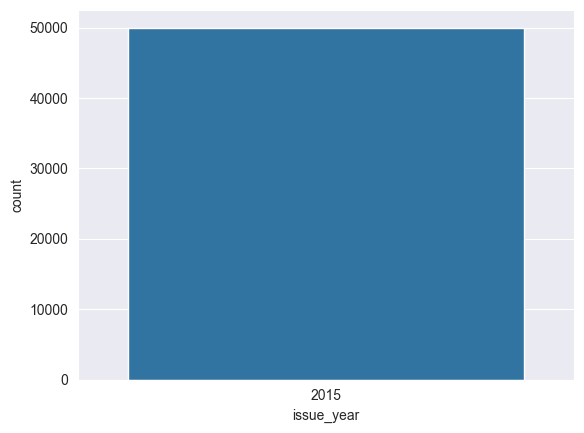

In [29]:
# show distribution of issue_year
sns.countplot(data=df, x='issue_year')

Contrary to **issue_year* the variable **issue_month** does show some variation, as shown in the plot below.

<Axes: xlabel='issue_month', ylabel='count'>

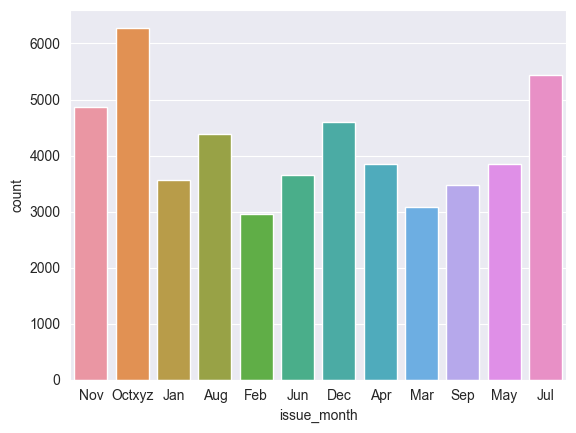

In [31]:
# show distribution of issue_month
sns.countplot(data=df, x='issue_month')

However, we also see that *October* was misspelled as *Octxyz*. We can fix this by replacing the misspelled value with the correct one.

In [32]:
# replace misspelled value
df['issue_month'] = df['issue_month'].replace('Octxyz', 'Oct')
df['issue_month'].unique()

array(['Nov', 'Oct', 'Jan', 'Aug', 'Feb', 'Jun', 'Dec', 'Apr', 'Mar',
       'Sep', 'May', 'Jul'], dtype=object)

To remedy the fact that issue_year contains no variation, but we still would like to know the year, we can create a new variable that combines the year and month into a single variable. This will allow us to keep the information about the year, but also the month. The same transformation can be applied to the other time variables in the dataset (earliest_cr_line_month, earliest_cr_line_year, last_pymnt_month, last_pymnt_year, next_pymnt_month, next_pymnt_year, last_credit_pull_month, last_credit_pull_year).

In [33]:
# create new variable issue_date with data type datetime
df['issue_date'] = pd.to_datetime(df['issue_year'].astype(str) + '-' + df['issue_month'], format='%Y-%b')

# drop issue_year and issue_month
df = df.drop(columns=['issue_year', 'issue_month'])

# show first 5 rows
df['issue_date'].head(5)

34866   2015-11-01
2735    2015-10-01
40836   2015-01-01
21990   2015-08-01
4759    2015-10-01
Name: issue_date, dtype: datetime64[ns]

# 1.5. Text Issues

# Data Protection
We might want to encrypt some variables that contain sensitive information, such as the url. This is because the url might contain information that could be used to identify the borrower. We can do this by replacing the url with a hash value.

In [ ]:
# encrypt url
df['url'] = df['url'].apply(lambda x: hash(x))

TODO:
* Handle Missing cases
*   Remove rows with only missing values
*   Remove columns with only missing values
*   Convert Mssing values to NA where sensible
*   Impute missing values